# Traitements avancés - Corrigé

![Marvel](image.jpg)

Le but de ce notebook est de découvrir comment effectuer des traitements avancés sur des fichiers _csv_ :
* rechercher des données répondant à des conditions précises
* calculer la moyenne de certains champs
* ...

## Importation des données :

Nous allons travailler avec un fichier _csv_ contenant des informations sur les personnages de l'univers marvel.

Le fichier s'appelle ``marvel.csv``.

Le fichier contient les champs suivants :
* **page_id** : un numéro d'identification
* **name** : le nom du personnage
* **ID** : son identité (Secret Identity, Public Identity, No Dual Identity ...) 
* **ALIGN** : gentil ou méchant ? (Good Characters, Bad Characters, Neutral Characters)
* **EYE** : couleur des yeux
* **HAIR** : couleur des cheveux
* **SEX** : Male Characters, Female Characters, Agender Characters, Genderfluid Characters
* **ALIVE** : Living Characters ou Deceased Characters
* **APPEARANCES** : le nombre d'apparitions (_int_)
* **FIRST APPEARANCE** : la date de 1ère apparition (_string_)
* **Year** : année de la première apparition, -1 si non renseigné (_int_)

Certains champs ne sont pas toujours renseignés. Les valeurs sont alors des ``?`` pour les _str_ et ``-1`` pour les _int_

1. Importer les lignes de ce fichier dans un tableau ``heros``. Ne pas oublier de supprimer la première ligne avec les entêtes.

In [5]:
heros = []

with open("marvel.csv", "r") as fichier :
    for ligne in fichier :
        heros.append(ligne[:-1].split(';'))

heros.pop(0)

['name',
 'ID',
 'ALIGN',
 'EYE',
 'HAIR',
 'SEX',
 'ALIVE',
 'APPEARANCES',
 'FIRST APPEARANCE',
 'Year']

Vérification :

In [6]:
# Cette instruction affiche les trois premières lignes
heros[:3]

[['Spider-Man (Peter Parker)',
  'Secret Identity',
  'Good Characters',
  'Hazel Eyes',
  'Brown Hair',
  'Male Characters',
  'Living Characters',
  '4043',
  'Aug-62',
  '1962'],
 ['Captain America (Steven Rogers)',
  'Public Identity',
  'Good Characters',
  'Blue Eyes',
  'White Hair',
  'Male Characters',
  'Living Characters',
  '3360',
  'mars-41',
  '1941'],
 ['"Wolverine (James \\""Logan\\"" Howlett)"',
  'Public Identity',
  'Neutral Characters',
  'Blue Eyes',
  'Black Hair',
  'Male Characters',
  'Living Characters',
  '3061',
  'oct-74',
  '1974']]

2. Typer les données (en particulier les entiers)

In [9]:
for ligne in heros :
    ligne[-3] = int(ligne[-3])
    ligne[-1] = int(ligne[-1])

heros[0]

['Spider-Man (Peter Parker)',
 'Secret Identity',
 'Good Characters',
 'Hazel Eyes',
 'Brown Hair',
 'Male Characters',
 'Living Characters',
 4043,
 'Aug-62',
 1962]

## Calcul de moyenne :

Nous allons dans un premier temps calculer le nombre d'apparition moyen des personnages.

Voici l'algorithme en français :

    somme = 0
    pour toutes les lignes du tableau :
            somme = somme + valeur d'apparition de la ligne
    moyenne = somme / nombre de lignes

1. Coder cet algorithme :

In [10]:
somme = 0

for ligne in heros :
    somme += ligne[-3]

moyenne = somme / len(heros)

In [11]:
moyenne

15.893380556912556

Il est plus intéressant de coder cet algorithme dans une fonction qui prendra en argument le tableau de données et la colonne sur laquelle calculer la moyenne.

Cette fonction renverra la valeur de la moyenne.

2. Compléter la fonction ci-dessous dont on a donné les spécifications :

In [12]:
def moyenne(tableau, colonne) :
    """
    Fonction calculant la moyenne de la colonne indiquée du tableau fourni en argument
    tableau est un tableau de tableaux. Chaque ligne contient différentes colonnes
    colonne est le numéro de la colonne dont on veut calculer la moyenne
    Renvoie la moyenne de la colonne concernée au format float
    """
    
    # Préconditions (partielles)
    assert isinstance(tableau, list), "tableau doit être une liste"
    assert isinstance(colonne, int), "colonne doit être un entier"
    
    somme = 0

    for ligne in tableau :
        somme += ligne[colonne]

    return somme / len(tableau)

3. Vérifier votre code avec les tests suivants :

In [13]:
# Ce test doit renvoyer 10.0
moyenne([[5,8],[15,9]],0)

10.0

In [14]:
# Ce test doit renvoyer 8.5
moyenne([[5,8],[15,9]],1)

8.5

## Recherches de valeurs :

1. Utiliser une liste par compréhension afin d'extraire les lignes des héros ``Genderfluid Characters`` :

In [17]:
genderfluids = [ligne for ligne in heros if ligne[5] == "Genderfluid Characters"]

In [20]:
genderfluids

[['Loki Laufeyson',
  'No Dual Identity',
  'Neutral Characters',
  'Green Eyes',
  'Black Hair',
  'Genderfluid Characters',
  'Living Characters',
  532,
  'Aug-49',
  1949],
 ['Xavin',
  'Secret Identity',
  'Good Characters',
  'Brown Eyes',
  'Brown Hair',
  'Genderfluid Characters',
  'Living Characters',
  33,
  'oct-05',
  2005]]

In [21]:
len(genderfluids)

2

Là encore, il est plus facile d'utiliser une fonction permettant de faire les sélections. Cette fonction permendra en argument un tableau dans lequel chercher et la condition à chercher.

Une remarque sur la fonction ``eval`` de python avant de donner le code.

Cette fonction permet d'évaluer une chaîne de caractère comme si elle était du code python. Cela fonction pour des tests ou des calculs à effectuer

In [2]:
instruction = "3 * 2"

a = eval(instruction)

a

6

On peut aussi, et surtout ici, l'utiliser pour effectuer des tests :

In [4]:
tableau = [4, 5, 6]

In [5]:
eval("5 in tableau")

True

In [6]:
eval("4 in tableau and 7 in tableau")

False

On peut alors faire un test sur toutes les éléments d'un tableau :

In [8]:
tableau = [12, 8, 9, 0]

# Ce test ne retiendra que les nombres présents dans les tables de 2 et 3
test = "element % 2 == 0 and element % 3 == 0"

[element for element in tableau if eval(test)]

[12, 0]

Notez qu'il faut que le test soit en accord avec la façon de parcourir le tableau. Ici on utilise la variable ``elemenent``

Voici le code de la fonction ``recherche`` :

In [23]:
def cherche(tableau, condition) :
    """
    Fonction cherchant dans le tableau donné, les lignes vérifiant la condition donnée
    tableau ets un tableau de tableau
    condition est une proposition du type "'man' in ligne[1] and ligne[-3] > 100" pour les héros 
    dont le nom contient 'man' et étant apparus plus de 100 fois
    Renvoie la liste des lignes trouvées ainsi que le nombre de lignes
    """
    
    resultat = [ligne for ligne in tableau if eval(condition)] 
    
    return resultat, len(resultat)

2. Utiliser cette fonction afin de retrouver le résultat de la question 1. 

In [24]:
cherche(heros, "ligne[5] == 'Genderfluid Characters'")

([['Loki Laufeyson',
   'No Dual Identity',
   'Neutral Characters',
   'Green Eyes',
   'Black Hair',
   'Genderfluid Characters',
   'Living Characters',
   532,
   'Aug-49',
   1949],
  ['Xavin',
   'Secret Identity',
   'Good Characters',
   'Brown Eyes',
   'Brown Hair',
   'Genderfluid Characters',
   'Living Characters',
   33,
   'oct-05',
   2005]],
 2)

Vous remarquerez que la fonction renvoie deux valeurs :
* le tableau avec les résultats
* la longueur du tableau

On peut les stocker ainsi :

In [26]:
tab_resultat, nb_resultat = cherche(heros, "ligne[-3] > 600")

Dans ce cas on a:

In [27]:
tab_resultat

[['Spider-Man (Peter Parker)',
  'Secret Identity',
  'Good Characters',
  'Hazel Eyes',
  'Brown Hair',
  'Male Characters',
  'Living Characters',
  4043,
  'Aug-62',
  1962],
 ['Captain America (Steven Rogers)',
  'Public Identity',
  'Good Characters',
  'Blue Eyes',
  'White Hair',
  'Male Characters',
  'Living Characters',
  3360,
  'mars-41',
  1941],
 ['"Wolverine (James \\""Logan\\"" Howlett)"',
  'Public Identity',
  'Neutral Characters',
  'Blue Eyes',
  'Black Hair',
  'Male Characters',
  'Living Characters',
  3061,
  'oct-74',
  1974],
 ['"Iron Man (Anthony \\""Tony\\"" Stark)"',
  'Public Identity',
  'Good Characters',
  'Blue Eyes',
  'Black Hair',
  'Male Characters',
  'Living Characters',
  2961,
  'mars-63',
  1963],
 ['Thor (Thor Odinson)',
  'No Dual Identity',
  'Good Characters',
  'Blue Eyes',
  'Blond Hair',
  'Male Characters',
  'Living Characters',
  2258,
  'nov-50',
  1950],
 ['Benjamin Grimm',
  'Public Identity',
  'Good Characters',
  'Blue Eyes',
 

In [28]:
nb_resultat

55

Ou accéder directement au nombre ainsi :

In [29]:
cherche(heros, "ligne[-3] > 600")[1]

55

En fait le type de données renvoyer est un ``tuple`` :

In [30]:
type(cherche(heros, "ligne[-3] > 600"))

tuple

Cette structure de données python s'apparente aux listes à la différence près qu'un tuple n'est pas __mutable__ : une fois fixé, la valeur d'un tuple __ne peut pas être modifiée__.

On les identifie en python avec des parenthèses (pas toujours indispensables) et des virgules :

In [7]:
a = (8, "mot")

In [8]:
type(a)

tuple

In [9]:
a[0]

8

In [10]:
a[1]

'mot'

In [11]:
a[1] = "un autre mot"

TypeError: 'tuple' object does not support item assignment

3. Combien y-a-t'il de personnages féminins dans le tableau principal ?

In [31]:
cherche(heros, "ligne[5] == 'Female Characters'")[1]

3837

4. Et de personnages masculins ?

In [32]:
cherche(heros, "ligne[5] == 'Male Characters'")[1]

11638

5. Combien de personnages féminins sont apparus plus de 1000 fois (inclu) ?

In [35]:
cherche(heros, "ligne[5] == 'Female Characters' and ligne[-3] >= 1000")[1]

8

6. Même question pour les personnages masculins.

In [36]:
cherche(heros, "ligne[5] == 'Male Characters' and ligne[-3] >= 1000")[1]

24

7. On complique : combien de personnages masculins blonds sont apparus pour la première fois après 1980 (exclu) ?

In [38]:
cherche(heros, "ligne[5] == 'Male Characters' and ligne[4] == 'Blond Hair' and ligne[-1] > 1980")[1]

526

8. Et combien de personnages gentils, aux yeux NON bleux sont masculins ?

In [39]:
cherche(heros, "ligne[5] == 'Male Characters' and 'Blue' not in ligne[3] and ligne[2] == 'Good Characters'")[1]

2450

9. Les moyennes calculées dans la première partie incluaient des valeurs 0 qui correspondent à une absence de données. Utiliser les fonctions ``cherche`` et ``moyenne`` afin de déterminer la vraie moyenne du nombre d'apparition des personnages féminins. 

In [45]:
non_vides, nb_non_vides = cherche(heros, "ligne[-3] != 0")

In [46]:
len(heros)

16376

In [47]:
nb_non_vides

15280

In [48]:
moyenne(non_vides, -3)

17.033376963350786

## Les comics sont-ils sexistes ?

Cette base de données a été construite par le site [FiveThirtyEight](https://fivethirtyeight.com/) qui travaille étroitement avec le NY Times pour des sujets plus ou moins sérieux mais en faisant toujours des traitements statistiques __très__ sérieux.

Le but de l'article était de répondre à la question [Comic Books Are Still Made By Men, For Men And About Men](https://fivethirtyeight.com/features/women-in-comic-books/).

Pouvez-vous proposer des arguments en utilisant les outils vus aujourd'hui ?

In [84]:
# Nombre de personnages par genre
_, masculins = cherche(heros, "ligne[5] == 'Male Characters'")
_, feminins = cherche(heros, "ligne[5] == 'Female Characters'")

In [85]:
"Masculins " + str(masculins) + "  //  Féminins " + str(feminins) 

'Masculins 11638  //  Féminins 3837'

In [71]:
# Apparition moyenne des personnages masculins
non_vides, nb_non_vides = cherche(heros, "ligne[5] == 'Male Characters' and ligne[-3] != 0")
moyenne(non_vides, -3)

16.753922378199835

In [72]:
# Apparition moyenne des personnages féminins
non_vides, nb_non_vides = cherche(heros, "ligne[5] == 'Female Characters' and ligne[-3] != 0")
moyenne(non_vides, -3)

20.284801333703808

In [73]:
# Date d'appartion moyenne des personnages masculins
non_vides, nb_non_vides = cherche(heros, "ligne[5] == 'Male Characters' and ligne[-1] != -1")
moyenne(non_vides, -1)

1983.181981981982

In [74]:
# Date d'appartion moyenne des personnages féminins
non_vides, nb_non_vides = cherche(heros, "ligne[5] == 'Female Characters' and ligne[-1] != -1")
moyenne(non_vides, -1)

1990.4401874310915

In [97]:
# nb de gentils/méchants/neutres par genre
_, gentils_m = cherche(heros, "ligne[5] == 'Male Characters' and ligne[2] == 'Good Characters'")
_, gentils_f = cherche(heros, "ligne[5] == 'Female Characters' and ligne[2] == 'Good Characters'")
_, mechants_m = cherche(heros, "ligne[5] == 'Male Characters' and ligne[2] == 'Bad Characters'")
_, mechants_f = cherche(heros, "ligne[5] == 'Female Characters' and ligne[2] == 'Bad Characters'")
_, neutres_m = cherche(heros, "ligne[5] == 'Male Characters' and ligne[2] == 'Neutral Characters'")
_, neutres_f = cherche(heros, "ligne[5] == 'Female Characters' and ligne[2] == 'Neutral Characters'")

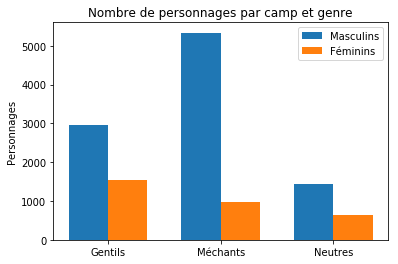

In [98]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Gentils', 'Méchants', 'Neutres']
masculins = [gentils_m, mechants_m, neutres_m]
feminins = [gentils_f, mechants_f, neutres_f]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, masculins, width, label='Masculins')
rects2 = ax.bar(x + width/2, feminins, width, label='Féminins')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Personnages')
ax.set_title('Nombre de personnages par camp et genre')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [77]:
# nombre de personnage blond par genre
_, blonds_m = cherche(heros, "ligne[5] == 'Male Characters' and 'Blond' in ligne[4]")
_, blonds_f = cherche(heros, "ligne[5] == 'Female Characters' and 'Blond' in ligne[4]")

In [82]:
# En absolu :
"Masculins blonds " + str(blonds_m) + "  //  Féminins blonds " + str(blonds_f) 

'Masculins blonds 867  //  Féminins blonds 760'

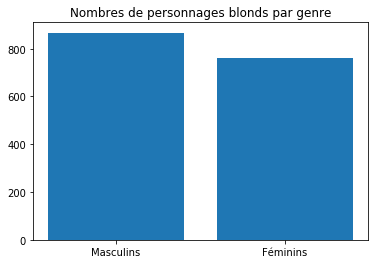

In [92]:
import matplotlib.pyplot as plt

labels = ['Masculins', 'Féminins']
blonds = [blonds_m, blonds_f]

plt.bar(labels, blonds)
plt.title("Nombres de personnages blonds par genre")
plt.show()

In [86]:
# En % :
"Masculins blonds " + str(blonds_m/masculins*100) + "  //  Féminins blonds " + str(blonds_f/feminins*100) 

'Masculins blonds 7.449733631208111  //  Féminins blonds 19.807140995569455'

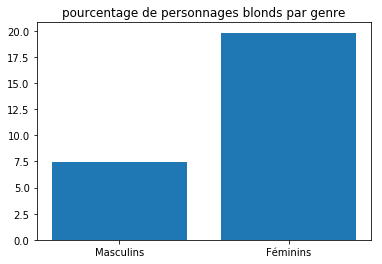

In [93]:
import matplotlib.pyplot as plt

labels = ['Masculins', 'Féminins']
blonds = [blonds_m/masculins*100, blonds_f/feminins*100]

plt.bar(labels, blonds)
plt.title("pourcentage de personnages blonds par genre")
plt.show()

In [88]:
# nombre de personnage blond aux yeux bleus par genre
_, blonds_bleus_m = cherche(heros, "ligne[5] == 'Male Characters' and 'Blond' in ligne[4] and 'Blue' in ligne[3]")
_, blonds_bleus_f = cherche(heros, "ligne[5] == 'Female Characters' and 'Blond' in ligne[4] and 'Blue' in ligne[3]")

In [89]:
# En absolu :
"Masculins blonds aux yeux bleus" + str(blonds_bleus_m) + "  //  Féminins blonds aux yeux bleus" + str(blonds_bleus_f) 

'Masculins blonds aux yeux bleus357  //  Féminins blonds aux yeux bleus313'

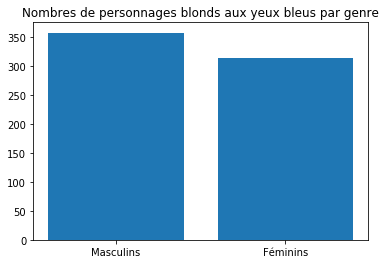

In [94]:
import matplotlib.pyplot as plt

labels = ['Masculins', 'Féminins']
blonds = [blonds_bleus_m, blonds_bleus_f]

plt.bar(labels, blonds)
plt.title("Nombres de personnages blonds aux yeux bleus par genre")
plt.show()

In [90]:
# En % :
"Masculins blonds aux yeux bleus " + str(blonds_bleus_m/masculins*100) + "  //  Féminins blonds aux yeux bleus " + str(blonds_bleus_f/feminins*100) 

'Masculins blonds aux yeux bleus 3.067537377556281  //  Féminins blonds aux yeux bleus 8.157414646859525'

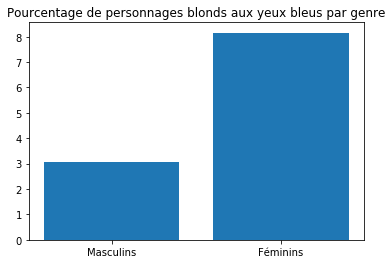

In [96]:
import matplotlib.pyplot as plt

labels = ['Masculins', 'Féminins']
blonds = [blonds_bleus_m/masculins*100, blonds_bleus_f/feminins*100]

plt.bar(labels, blonds)
plt.title("Pourcentage de personnages blonds aux yeux bleus par genre")
plt.show()